In [1]:
import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
import matplotlib.pyplot as plt
import os
import cv2
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

Using TensorFlow backend.


In [3]:
dict = {'CALsuburb': '9', 'PARoffice': '7','bedroom': '12','coast': '10',
    'forest': '4','highway': '14','industrial': '2', 'insidecity':'3',
    'kitchen': '0','livingroom': '5','mountain': '8','opencountry': '6',
    'store': '11','street': '1','tallbuilding': '13'}

In [4]:
from os import listdir
from os.path import isfile, isdir, join
from os import walk
mypath = "/home/jovyan/where_am_i/train"
files = listdir(mypath)
name_list = []
pred_name_list = []
dirs_list = []
y_train = []
pred_id = []
batch_size =  50  #32or 64 or128
num_classes = 15
epochs = 100
save_dir =  'saved_models'
model_name = 'keras_cifar10_trained_model.h5'

#load 目錄str
for f in files:    #資料夾紀錄
    fullpath = join(mypath, f)        
    if isdir(fullpath):
        dirs_list.append(f); 
for f in range(len(dirs_list)):#label,圖片路徑   
    mypath = "/home/jovyan/where_am_i/train/"+dirs_list[f]
    for i in os.listdir(mypath):
        name_list.append(mypath+'/'+i);
        y_train.append(dict[dirs_list[f]])    #label    

print(len(name_list))
print(type(y_train))

for root, dirs, files in walk("/home/jovyan/where_am_i/testset/"):
    for f in files:
        pred_name_list.append("/home/jovyan/where_am_i/testset/"+f)
        pred_id.append(f)
del pred_id[1501] 
del pred_id[1500] 
print(len(pred_id))
#print(y_train)

2988
<class 'list'>
1500


In [5]:
#讀圖train
x_train = []
x_pred  = []
print(len(name_list))
print(len(y_train))
print(type(y_train))
for i in range(len(name_list)):
    if name_list[i].endswith('.jpg'):
        img = cv2.imread(name_list[i])
        img = cv2.resize(img, (80, 80)) 
        img = np.float32(img)
        x_train.append(img)
    else:
        del y_train[i]
#讀test
for i in range(1500):
    if pred_name_list[i].endswith('.jpg'):
        img = cv2.imread(pred_name_list[i])
        #rint(pred_name_list[i])
       #print(i)
        img = cv2.resize(img, (80, 80)) 
        img = np.float32(img)
        x_pred.append(img)
        #pred_id.append()
        
#print(x_train.shape)
print(len(y_train))
print(len(x_train))
print(len(x_pred))
#print(x_train[10])
    #tx.append(img)
#images = np.array(images)
    #raise #強制停止

2988
2988
<class 'list'>
2985
2985
1500


In [6]:
x_train = np.array(x_train)  # 模型只吃 numpy.array 型態的資料，所以先把 x_train 轉成 numpy.array  
y_train = np.array(y_train)
x_pred = np.array(x_pred)
print(x_train.shape)
print(y_train.shape)
print(x_pred.shape)

(2985, 80, 80, 3)
(2985,)
(1500, 80, 80, 3)


In [7]:

#Normalization
#print(x_train)
x_train = x_train.astype('float32')
x_train /= 255.
x_pred = x_pred.astype('float32')
x_pred /= 255.

# Train Data Split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)
#將label做 one_hot encoding
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (2388, 80, 80, 3)
2388 train samples
597 test samples


In [8]:
# build our CNN model
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 80, 80, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 80, 80, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 78, 78, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 78, 78, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 39, 39, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 39, 39, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 39, 39, 64)        73792     
__________

In [9]:
# initiate Adam optimizer
opt = keras.optimizers.Adam()#lr=0.0003,amsgrad=True

# Let's train the model using Adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


print('Using real-time data augmentation.')


Using real-time data augmentation.


In [10]:
print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False # randomly flip images
    )


# Use ModelCheckpoint to save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=1)

# earlystop
earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

Using real-time data augmentation.


In [11]:
# Fit the model on the batches generated by datagen.flow().
model_history = model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4,
                    callbacks=[earlystop,checkpoint])

Epoch 1/100
46/48 [===========================>..] - ETA: 0s - loss: 2.6768 - acc: 0.1056
Epoch 00001: val_loss improved from inf to 2.60876, saving model to saved_models/keras_cifar10_trained_model.h5
48/48 [==============================] - 7s 135ms/step - loss: 2.6807 - acc: 0.1054 - val_loss: 2.6088 - val_acc: 0.1122
Epoch 2/100
46/48 [===========================>..] - ETA: 0s - loss: 2.5442 - acc: 0.1570
Epoch 00002: val_loss improved from 2.60876 to 2.26014, saving model to saved_models/keras_cifar10_trained_model.h5
48/48 [==============================] - 3s 72ms/step - loss: 2.5320 - acc: 0.1600 - val_loss: 2.2601 - val_acc: 0.2613
Epoch 3/100
47/48 [============================>.] - ETA: 0s - loss: 2.2912 - acc: 0.2409
Epoch 00003: val_loss improved from 2.26014 to 2.09590, saving model to saved_models/keras_cifar10_trained_model.h5
48/48 [==============================] - 3s 61ms/step - loss: 2.2926 - acc: 0.2388 - val_loss: 2.0959 - val_acc: 0.3149
Epoch 4/100
46/48 [======

In [12]:
# loading our save model
print("Loading trained model")
model = load_model(model_path)

Loading trained model


In [13]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

597/597 [==============================] - 0s 681us/step
Test loss: 0.76976111067
Test accuracy: 0.733668342607


597/597 [==============================] - 0s 362us/step
Test loss: 0.76976111067
Test accuracy: 0.733668342607


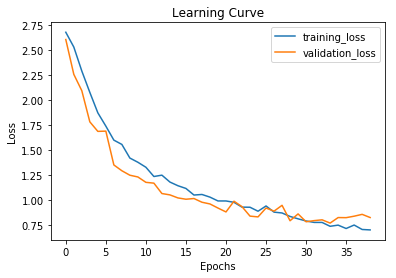

In [14]:
training_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

plt.plot(training_loss, label="training_loss")#觀察overftting
plt.plot(val_loss, label="validation_loss")#觀察overftting
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

In [15]:
print(x_pred[0])
y_pred = model.predict_classes(x_pred)


[[[ 0.69803923  0.69803923  0.69803923]
  [ 0.67843139  0.67843139  0.67843139]
  [ 0.63137257  0.63137257  0.63137257]
  ..., 
  [ 0.71764708  0.71764708  0.71764708]
  [ 0.73725492  0.73725492  0.73725492]
  [ 0.75686276  0.75686276  0.75686276]]

 [[ 0.6901961   0.6901961   0.6901961 ]
  [ 0.6901961   0.6901961   0.6901961 ]
  [ 0.70588237  0.70588237  0.70588237]
  ..., 
  [ 0.73725492  0.73725492  0.73725492]
  [ 0.75294119  0.75294119  0.75294119]
  [ 0.7647059   0.7647059   0.7647059 ]]

 [[ 0.7019608   0.7019608   0.7019608 ]
  [ 0.68627453  0.68627453  0.68627453]
  [ 0.67843139  0.67843139  0.67843139]
  ..., 
  [ 0.74509805  0.74509805  0.74509805]
  [ 0.76078433  0.76078433  0.76078433]
  [ 0.76862746  0.76862746  0.76862746]]

 ..., 
 [[ 0.22352941  0.22352941  0.22352941]
  [ 0.21176471  0.21176471  0.21176471]
  [ 0.19215687  0.19215687  0.19215687]
  ..., 
  [ 0.27450982  0.27450982  0.27450982]
  [ 0.25882354  0.25882354  0.25882354]
  [ 0.24313726  0.24313726  0.24313

In [16]:
def exportCSV (idset, dataset):
    df = pd.DataFrame({'id':idset,'class':dataset})
    df.to_csv('prediction.csv', sep=',', encoding='utf-8',index=False);

In [17]:
exportCSV(pred_id, y_pred)
print("Generate prediction.csv Successfully!")

1500
[13 10  9 ...,  5  1  4]
Generate prediction.csv Successfully!
